In [ ]:
import scipy.linalg as la
import numpy as np

In [ ]:
np.random.seed(0)
A = np.random.rand(5,4)

In [ ]:
A.shape

(5, 4)

svd , full matrix = true, full svd

*   List item
*   List item



In [ ]:
U, s, VT = np.linalg.svd(A, full_matrices=True)

Creating thr sigma matrix

In [ ]:
S = np.zeros(A.shape)
for i in range(len(s)):
  S[i,i] = s[i]

In [ ]:
# Above and below are same
S = la.diagsvd(s, A.shape[0],A.shape[1])

Reconstruct the original matrix

In [ ]:
A_svd = np.matmul(U, np.matmul(S,VT))
print(f"err: {(la.norm(A-A_svd)/la.norm(A))}") #check the norm
# value close to machine epsilon, which implies our matrices are almost similar

err: 4.3157440501506894e-16


Thin SVD

In [ ]:
U,s,VT = np.linalg.svd(A, full_matrices=False)
print(f"U: {U.shape}, s:{s.shape}, VT:{VT.shape}")

U: (5, 4), s:(4,), VT:(4, 4)


In [ ]:
S= np.diag(s)
S

array([[2.64618677, 0.        , 0.        , 0.        ],
       [0.        , 0.83351254, 0.        , 0.        ],
       [0.        , 0.        , 0.70753001, 0.        ],
       [0.        , 0.        , 0.        , 0.29842614]])

# **Image compression through Singular Value Decomposition**

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

image_path = "/content/TarantulaNebula.jpg"

A = imread(image_path)
# for geometric images, this shows how important axis is for SVD, images must be aligned with the axis.
# A = rotate(A, 20, reshape=False)

array([[[ 31,  41,  50],
        [ 35,  44,  53],
        [ 53,  60,  68],
        ...,
        [ 83,  93,  92],
        [ 41,  61,  59],
        [ 29,  54,  50]],

       [[ 33,  43,  52],
        [ 40,  49,  58],
        [104, 108, 117],
        ...,
        [112, 127, 124],
        [ 32,  53,  48],
        [ 35,  60,  54]],

       [[ 31,  40,  49],
        [ 20,  29,  38],
        [ 57,  61,  70],
        ...,
        [ 34,  57,  49],
        [ 33,  59,  50],
        [ 31,  57,  48]],

       ...,

       [[ 69,  56,  65],
        [ 48,  35,  42],
        [ 52,  40,  44],
        ...,
        [104, 109, 103],
        [ 17,  22,  18],
        [ 30,  35,  31]],

       [[ 63,  50,  59],
        [ 51,  38,  45],
        [ 46,  34,  38],
        ...,
        [ 75,  76,  71],
        [ 22,  22,  20],
        [ 30,  30,  28]],

       [[ 55,  43,  53],
        [ 65,  54,  62],
        [ 54,  42,  46],
        ...,
        [ 23,  22,  18],
        [ 52,  51,  49],
        [ 53,  52,  50]]], dtype=uint8)
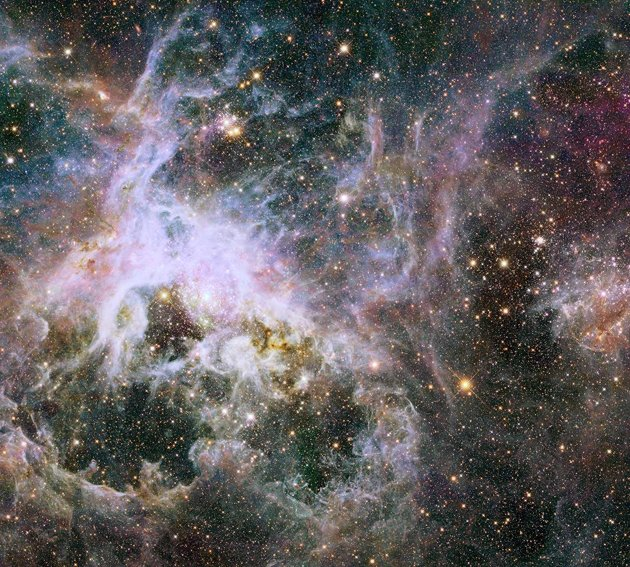

In [ ]:
A

(np.float64(-0.5), np.float64(629.5), np.float64(566.5), np.float64(-0.5))

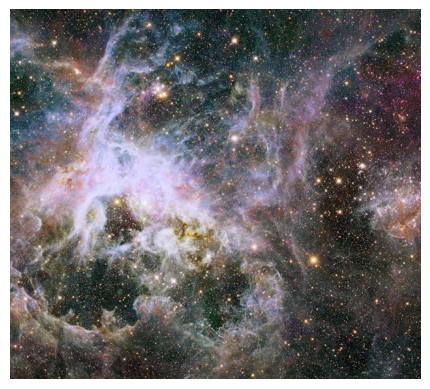

In [ ]:
#  Visualize the picture

img = plt.imshow(A)
plt.axis("off")

In [ ]:
# Convert to gray-scale(avg of RGB), so that we only have to apply SVD to one channel gray, rather than applying to 3 channels R,G,B

In [ ]:
X = np.mean(A, axis = 2) #axis means the average is applied only on the axis 2 ie axis 2 in the shape of image, ie 3 here

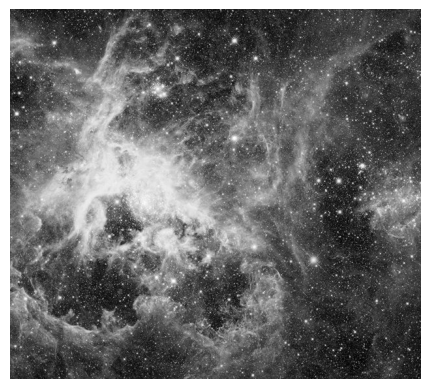

In [ ]:
img = plt.imshow(X)
plt.axis("off")
plt.set_cmap("gray")
plt.show()

In [ ]:
X.shape

(567, 630)

Perform SVD

In [ ]:
U,s,VT = np.linalg.svd(X, full_matrices=False)
print(f"U: {U.shape}, s:{s.shape}, VT:{VT.shape}")

U: (567, 567), s:(567,), VT:(567, 630)


Plot the trend of

- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$


Text(0.5, 1.0, 'Fraction of the explained variance')

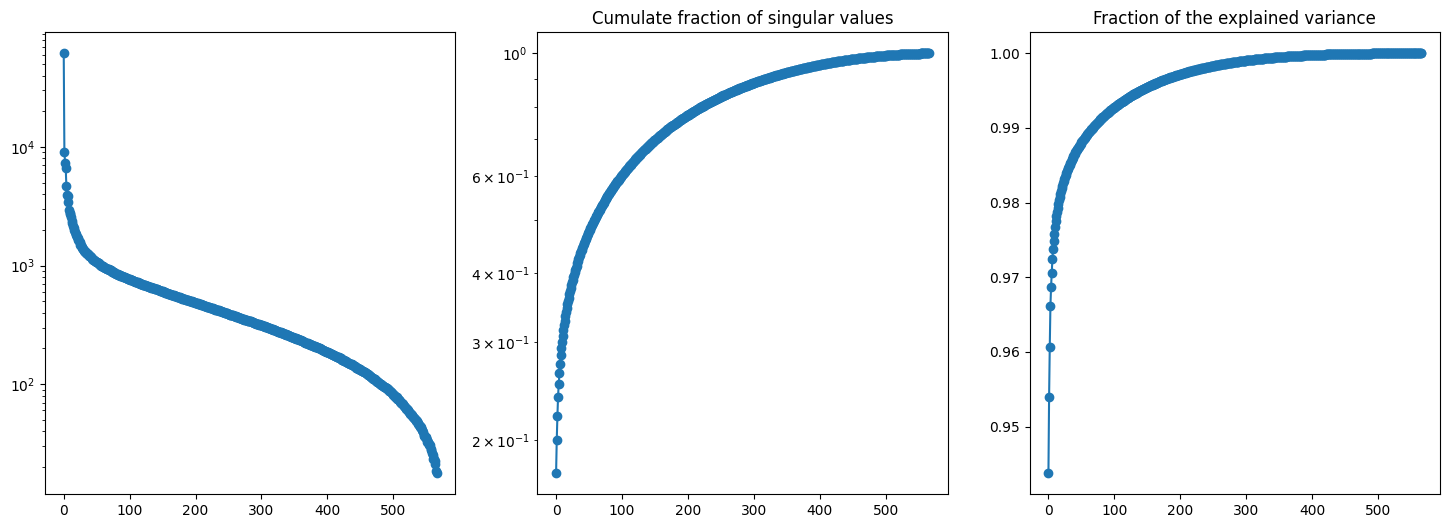

In [ ]:
fig, axes = plt.subplots(nrows =1, ncols =3, figsize = (18,6))
axes[0].semilogy(s, "o-") # semi-logarithmic scale of singular values

axes[1].semilogy(np.cumsum(s)/ np.sum(s), "o-")
axes[1].set_title("Cumulate fraction of singular values")

axes[2].plot(np.sqrt(np.cumsum(s**2)/ np.sum(s**2)), "o-")
axes[2].set_title("Fraction of the explained variance")

In [ ]:
# visualize the best rank k matrix, k = 1,5,10,50,100,500

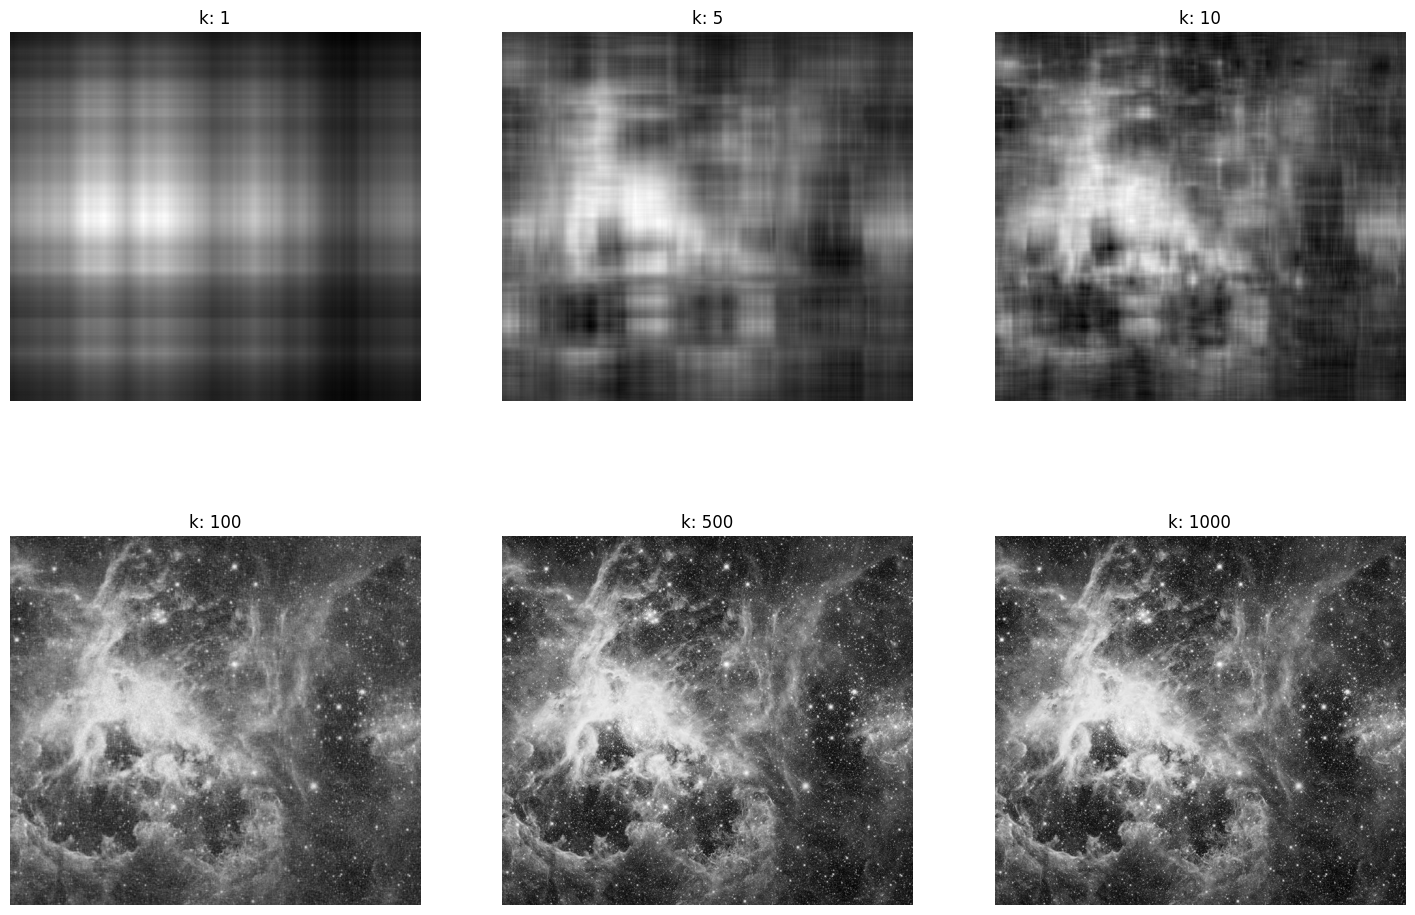

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(18,12))
axs = axs.reshape((-1))  #
idxs = [1,5,10,100,500,1000]
for i in range(len(idxs)):
  k = idxs[i]
  A_k = np.matmul(U[:, :k], np.matmul(np.diag(s[:k]),VT[:k, :]))
  axs[i].imshow(A_k, cmap="gray")
  axs[i].set_title(f"k: {k}")
  axs[i].axis("off")

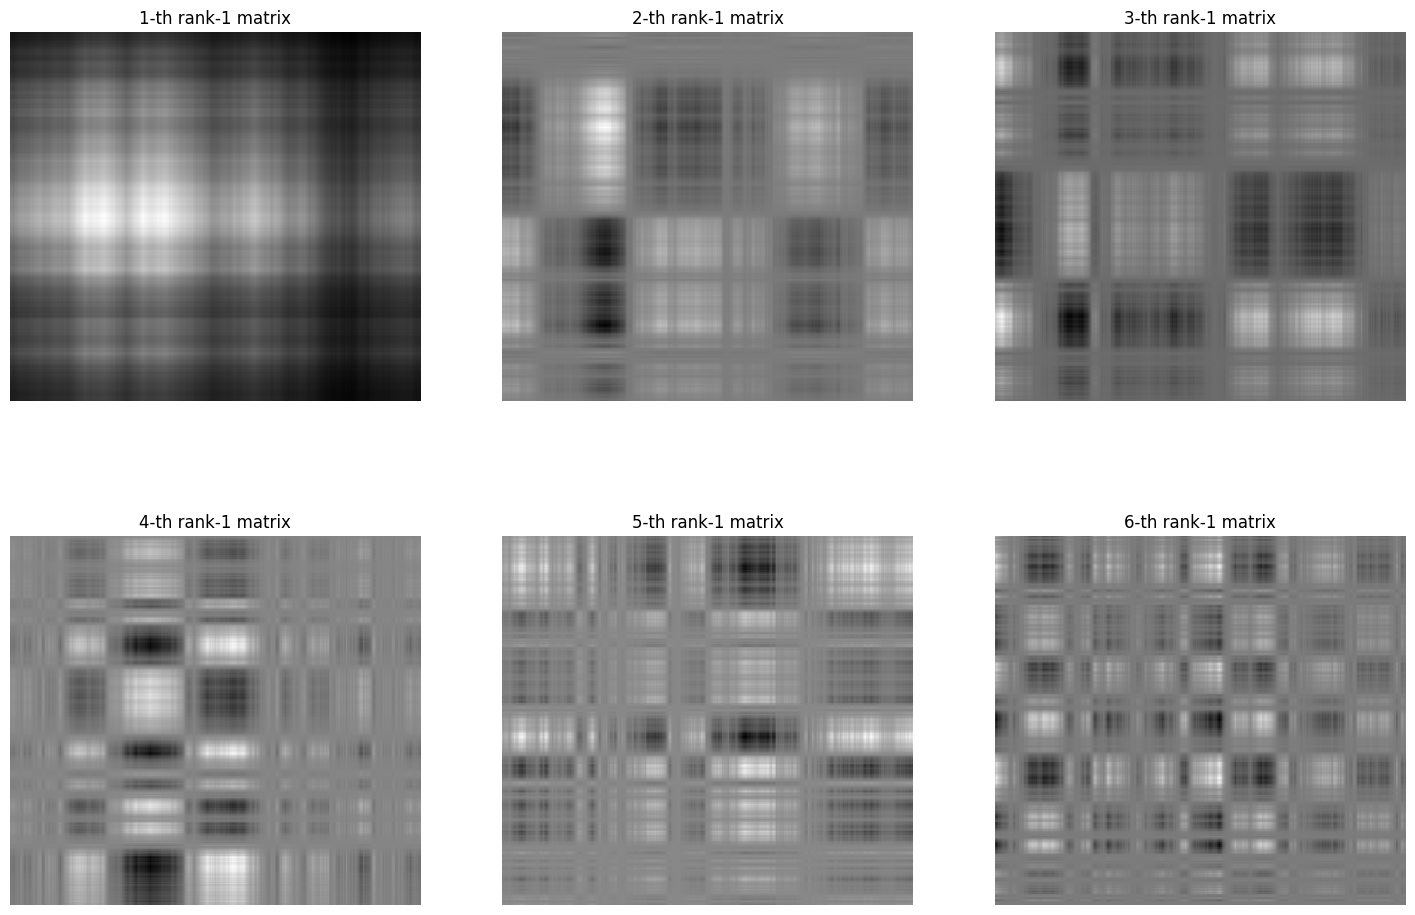

In [ ]:
# Visualize the k-th rank-1 matrix, for k = 1,2,..,6
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(18,12))
axs = axs.reshape((-1))
idxs = [1,2,3,4,5,6]
for i, k in enumerate(idxs):
  ukvk = np.outer(U[:, k - 1], VT[k-1, :])
  axs[i].imshow(ukvk, cmap="gray")
  axs[i].set_title(f"{k}-th rank-1 matrix")
  axs[i].axis("off")

Randomized SVD

In [ ]:
S = np.diag(s)

In [ ]:
X_svd = np.matmul(U, np.matmul(S,VT))

In [ ]:
def randomized_SVD(A, k):
  _, n = A.shape
  P = np.random.randn(n, k) # sketch matrix
  Z = A @ P
  Q, _ = np.linalg.qr(Z)
  Y = np.transpose(Q) @ A
  Uy, sy, VTy = np.linalg.svd(Y, full_matrices = False)
  U = Q @ Uy #going back to the full space
  return U, sy, VTy

In [ ]:
k = 100
U_rand, s_rand, VT_rand = randomized_SVD(X,k)

Plotting singular values, cumulate values and their cumulate squares

Text(0.5, 1.0, 'Explained variance')

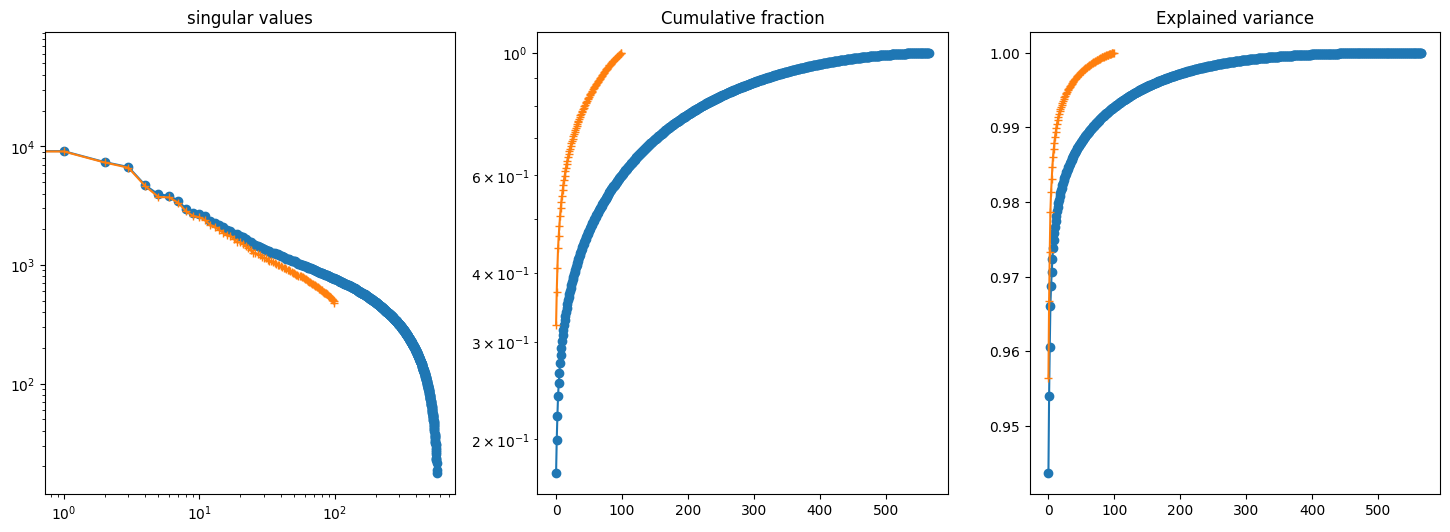

In [ ]:
fig, axes = plt.subplots(nrows =1, ncols =3, figsize = (18,6))
axes[0].loglog(s, "o-")
axes[0].loglog(s_rand, "+-") # semi-logarithmic scale of singular values
axes[0].set_title("singular values")

axes[1].semilogy(np.cumsum(s)/ np.sum(s), "o-")
axes[1].semilogy(np.cumsum(s_rand)/ np.sum(s_rand), "+-")
axes[1].set_title("Cumulative fraction")

axes[2].plot(np.sqrt(np.cumsum(s**2)/ np.sum(s**2)), "o-")
axes[2].plot(np.sqrt(np.cumsum(s_rand**2)/ np.sum(s_rand**2)), "+-")
axes[2].set_title("Explained variance")

 Compare best rank-k matrix obtained through SVD and the best rank-k matrix obtained through randomized SVD

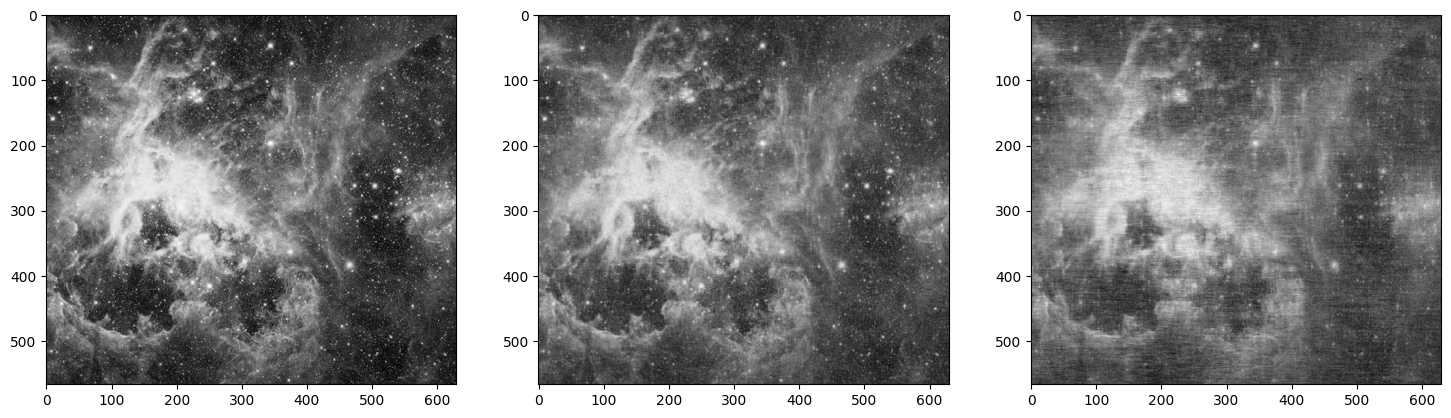

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(18,6))
axs[0].imshow(X, cmap="gray")
axs[1].imshow(U[:, :k] @ np.diag(s[:k]) @ VT[:k, :], cmap="gray")
axs[2].imshow(U_rand @ np.diag(s_rand) @ VT_rand, cmap="gray")

# Noise Removal using SVD

noise are the least important singular values in SVD

In [ ]:
image_path = "./mondrian.jpg"
A = imread(image_path)

Transform the image in gray-scale and add random noise

In [ ]:
X = np.mean(A, axis =2) / A.max() #max() for normalization
gamma = 0.1
X_noisy = X + gamma * np.random.randn(*X.shape)
X_noisy = np.clip(X_noisy, 0, 1) # since we normalized X, keeping the noise values within the range boundary 0-1

Text(0.5, 1.0, 'Noisy image')

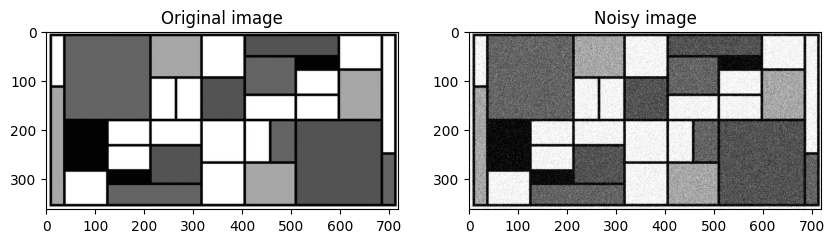

In [ ]:
# Plot the original image and noisy image
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(X, cmap="gray")
axs[0].set_title("Original image")
axs[1].imshow(X_noisy, cmap = "gray")
axs[1].set_title("Noisy image")